<a href="https://colab.research.google.com/github/AndresPautrat/PDI_UPC/blob/main/EliminarPatrones2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

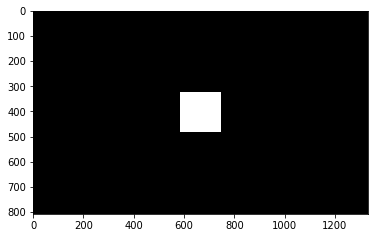

(<matplotlib.axes._subplots.AxesSubplot at 0x7f76127ffb38>,
 <matplotlib.image.AxesImage at 0x7f7612709da0>)

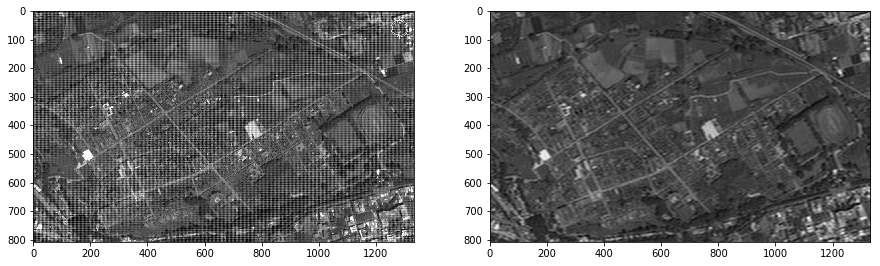

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im=cv2.imread('1.jpg',0)
f=np.fft.fft2(im)
fshift=np.fft.fftshift(f)

row,cols=im.shape
crow, ccol=row//2,cols//2

mask=np.zeros((row, cols), np.uint8)

xxx=80
mask[crow-xxx:crow+xxx,ccol-xxx:ccol+xxx]=1

fshift=fshift*mask

plt.figure()
plt.imshow(mask,cmap='gray')
plt.show()

f_ishift=np.fft.ifftshift(fshift)
im_back=np.fft.ifft2(f_ishift)
im_back=np.abs(im_back)

plt.figure(figsize=(15,14))

plt.subplot(1,2,1),plt.imshow(im,cmap='gray')
plt.subplot(1,2,2),plt.imshow(im_back, cmap='gray')

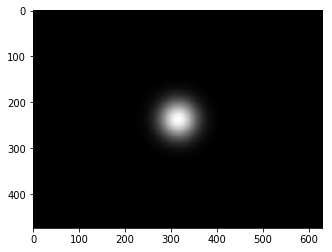

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7613540668>,
 <matplotlib.image.AxesImage at 0x7f7612df2588>)

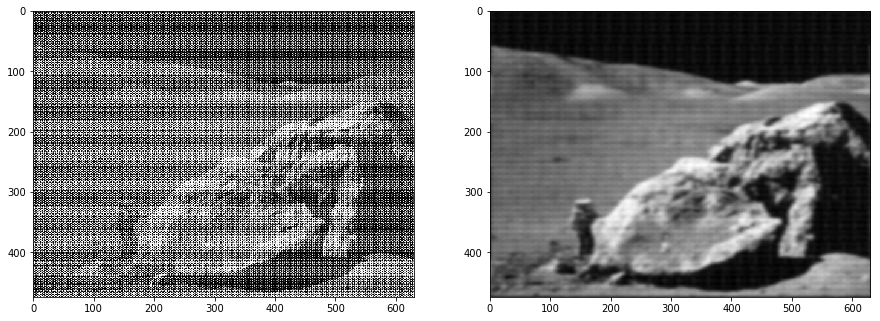

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im=cv2.imread('3.png',0)
f=np.fft.fft2(im)
fshift=np.fft.fftshift(f)

row,cols=im.shape
crow, ccol=row//2,cols//2

mask=1-np.zeros((row, cols), np.uint8)
xxx=10
support=5
mask=np.zeros((row,cols))
mask[crow-xxx:crow+xxx,ccol-xxx:ccol+xxx]=1

desv=40
for i in range(0,row):
  for j in range(0,cols):    
    mask[i,j]=np.exp(-((crow-i)**2+(ccol-j)**2)/(desv**2))

plt.figure()
plt.imshow(255*mask,cmap='gray')
plt.show()

fshift=fshift*mask

f_ishift=np.fft.ifftshift(fshift)
im_back=np.fft.ifft2(f_ishift)
im_back=np.abs(im_back)

plt.figure(figsize=(15,14))

plt.subplot(1,2,1),plt.imshow(im,cmap='gray')
plt.subplot(1,2,2),plt.imshow(im_back, cmap='gray')

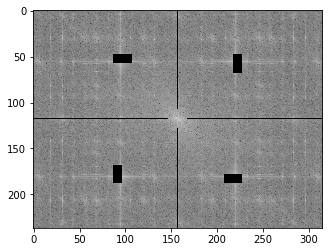

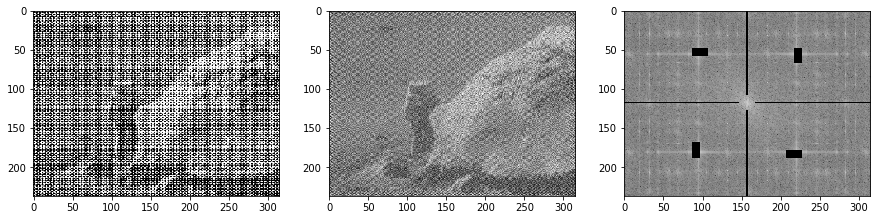

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('2.png',0)
f=np.fft.fft2(img)
f=np.fft.fftshift(f)


row,cols=img.shape
crow, ccol=row//2,cols//2

magnitud=20*np.log(np.abs(f))

ancho=1
anchow=10
radio=10

magnitud[crow-ancho:crow+ancho,ccol+radio:cols]=0
magnitud[crow-ancho:crow+ancho,0:ccol-radio]=0
magnitud[crow+radio:row,ccol-ancho:ccol+ancho]=0
magnitud[0:crow-radio,ccol-ancho:ccol+ancho]=0


magnitud[crow-anchow+60:crow+anchow+60,ccol-radio-60:ccol-60]=0
magnitud[crow-anchow-60:crow+anchow-60,ccol+60:ccol+radio+60]=0


magnitud[crow+60:crow+radio+60,ccol-anchow+60:ccol+anchow+60]=0
magnitud[crow-radio-60:crow-60,ccol-anchow-60:ccol+anchow-60]=0




f=f*magnitud


f_ishift=np.fft.ifftshift(f)
im_back=np.fft.ifft2(f_ishift)
im_back=np.abs(im_back)

plt.figure()
plt.imshow(magnitud,cmap='gray')
plt.show()

plt.figure(figsize=(15,14))
plt.subplot(1,3,1),plt.imshow(img,cmap='gray')
plt.subplot(1,3,2),plt.imshow(im_back,cmap='gray')
plt.subplot(1,3,3),plt.imshow(magnitud,cmap='gray')

plt.show()

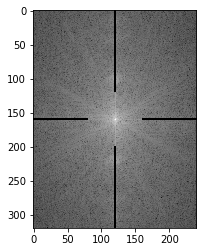

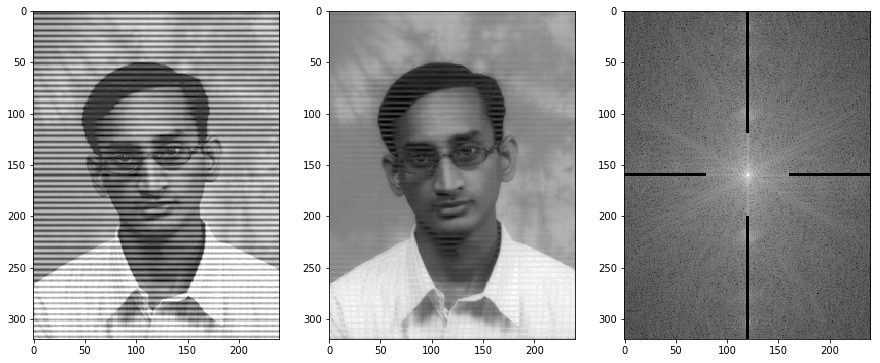

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('4.png',0)
f=np.fft.fft2(img)
f=np.fft.fftshift(f)


row,cols=img.shape
crow, ccol=row//2,cols//2

magnitud=20*np.log(np.abs(f))

ancho=1
radio=40

magnitud[crow-ancho:crow+ancho,ccol+radio:cols]=0
magnitud[crow-ancho:crow+ancho,0:ccol-radio]=0
magnitud[crow+radio:row,ccol-ancho:ccol+ancho]=0
magnitud[0:crow-radio,ccol-ancho:ccol+ancho]=0



f=f*magnitud


f_ishift=np.fft.ifftshift(f)
im_back=np.fft.ifft2(f_ishift)
im_back=np.abs(im_back)

plt.figure()
plt.imshow(magnitud,cmap='gray')
plt.show()

plt.figure(figsize=(15,14))
plt.subplot(1,3,1),plt.imshow(img,cmap='gray')
plt.subplot(1,3,2),plt.imshow(im_back,cmap='gray')
plt.subplot(1,3,3),plt.imshow(magnitud,cmap='gray')

plt.show()

In [ ]:
def filtroMediana(image,size):
  shift_row=size//2
  shift_col=size//2
  
  new_image=np.zeros((image.shape[0]+2*shift_row,
                      image.shape[1]+2*shift_col),np.float32)
  
  new_image[shift_row:shift_row+image.shape[0],            
            shift_col:shift_col+image.shape[1]]=image 
  
  result=np.zeros(new_image.shape,np.float32)
  
  for i in range(shift_row, image.shape[0]+shift_row):
    for j in range(shift_col,image.shape[1]+shift_col):
      aux=new_image[i-shift_row:i+shift_row+1,j-shift_col:j+shift_col+1]
      val=np.sort(aux,axis=None)
      result[i,j]=val[size**2//2]
      
  return result[shift_row:image.shape[0]+shift_row,
         shift_col:image.shape[1]+shift_col]

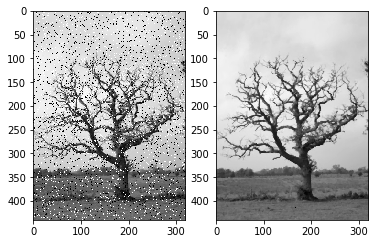

In [ ]:
im=cv2.imread('Arbol.jpg',640)
mask=(1/9)*np.ones((3,3))
im2=filtroMediana(im,3)

plt.figure()
plt.subplot(1,2,1),plt.imshow(im,cmap='gray')
plt.subplot(1,2,2),plt.imshow(im2,cmap='gray')
plt.show()

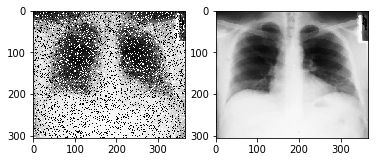

In [ ]:
im=cv2.imread('Radiografia.jpg',640)
mask=(1/9)*np.ones((3,3))
im2=filtroMediana(im,3)

im3=filtroMediana(im2,3)
im4=filtroMediana(im3,3)

plt.figure()
plt.subplot(1,2,1),plt.imshow(im,cmap='gray')
plt.subplot(1,2,2),plt.imshow(im4,cmap='gray')
plt.show()

In [ ]:
im4=cv2.imread('huella_1.jpg',0)
row,cols=im4.shape
print(row)
im4[477,400]
for i in range(0,400):
  for j in range(0,400): 
    im4[i,cols]

478


IndexError: ignored

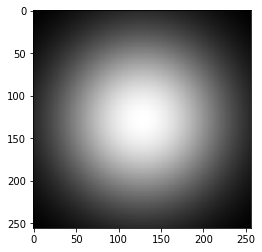

(<matplotlib.axes._subplots.AxesSubplot at 0x7f761385f390>,
 <matplotlib.image.AxesImage at 0x7f7612c66f98>)

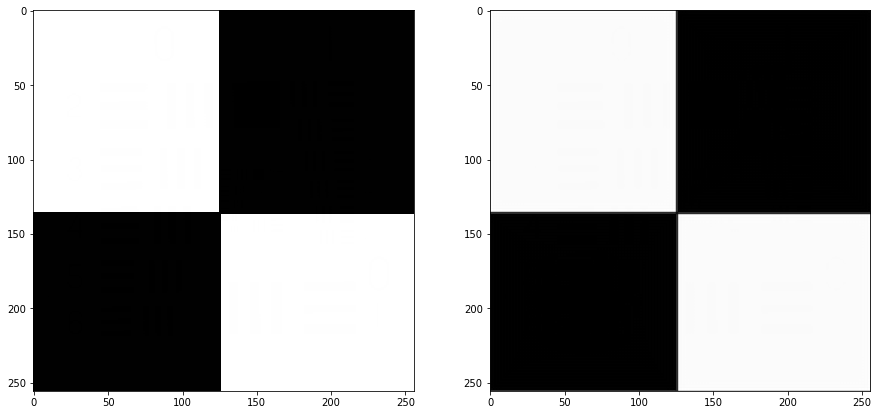

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im=cv2.imread('incognita1.tif',0)
f=np.fft.fft2(im)
fshift=np.fft.fftshift(f)

row,cols=im.shape
crow, ccol=row//2,cols//2

mask=1-np.zeros((row, cols), np.uint8)
xxx=1000
support=5
mask=np.zeros((row,cols))
mask[crow-xxx:crow+xxx,ccol-xxx:ccol+xxx]=1

desv=100
for i in range(0,row):
  for j in range(0,cols):    
    mask[i,j]=np.exp(-((crow-i)**2+(ccol-j)**2)/(desv**2))

plt.figure()
plt.imshow(255*mask,cmap='gray')
plt.show()

fshift=fshift*mask

f_ishift=np.fft.ifftshift(fshift)
im_back=np.fft.ifft2(f_ishift)
im_back=np.abs(im_back)

plt.figure(figsize=(15,14))

plt.subplot(1,2,1),plt.imshow(im,cmap='gray')
plt.subplot(1,2,2),plt.imshow(im_back, cmap='gray')